In [1]:
# 
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
data = iris.data  # 特征值
target = iris.target  # 目标值

In [12]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=4)
for train_index, test_index in kf.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [ ]:
>>> from sklearn.model_selection import KFold
>>> X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
>>> y = np.array([1, 2, 3, 4])
>>> kf = KFold(n_splits=2)
>>> kf.get_n_splits(X)
2
>>> print(kf)  # doctest: +NORMALIZE_WHITESPACE
KFold(n_splits=4, random_state=None, shuffle=False)
>>> for train_index, test_index in kf.split(X):
...    print("TRAIN:", train_index, "TEST:", test_index)
...    X_train, X_test = X[train_index], X[test_index]
...    y_train, y_test = y[train_index], y[test_index]
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]

In [7]:
from sklearn.model_selection import KFold

In [ ]:
# KFold(n_splits=3, shuffle=False, random_state=None)
# n_splits 分几份 
KFold()

In [6]:
# 交叉验证
# model_selection 里面是和模型选择相关的一些工具
# cross_val cross_validate 交叉验证
# cross_val_score 交叉验证然后打分
from sklearn.model_selection import cross_val_score

In [ ]:
# cross_val_score(lasso, X, y)

In [20]:
kf = KFold(n_splits=10)  # 创建切分对象

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier()

In [23]:
# estimator 传入机器学习模型
# X 是特征值
# y 是目标值
# X y 把整个数据集都传入即可 不需要切分训练集和测试集 cross_val_score自己会切分
# cv=None, cv参数 cross_validate 交叉验证  如果是简单的切分直接传入数字即可 如果还想随机打乱顺序或者设置随机的种子 可以用KFold对象
cross_val_score(knn,data,target,cv=10)  # 这里不需要切分数据集 函数内部会自己切分

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [40]:
cross_val_score(knn,data,target,cv=10).mean()

0.9666666666666668

In [41]:
cross_val_score(knn,data,target,cv=10).std()

0.04472135954999579

In [ ]:
# 可以把 各种机器学习模型 使用 cross_val_score 进行打分
# 挑选 平均分比较高的 std标准差小的（稳定） 的 机器学习模型 来对 数据集进行处理

In [ ]:
# 使用 cross_val_score() 可以挑选一个比较好的模型

In [ ]:
KNeighborsClassifier()  # 如果模型已经确定了 模型中还有很多参数 想要查看不同参数对结果的影响 可以使用网格搜索

In [24]:
# GridSearchCV 网格 搜索 CV cross_validation 交叉验证
from sklearn.model_selection import GridSearchCV

In [42]:
params = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [37]:
# estimator, 要测试的模型
# param_grid, 传入要验证的各种参数（这个函数会对参数进行网格化）
# 把所有的 参数的排列组合情况 都生成一个模型
grid = GridSearchCV(knn,params,cv=10)

In [ ]:
grid  # 对参数进行了 网格化处理之后的 对象
# 这个对象 和 普通的机器学习模型对象 使用起来是一样的

In [38]:
grid.fit(data,target)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 10), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
# 通过 各种参数的组合 获取一个分数最高的
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [ ]:
# elbow point

In [ ]:
# 提供不同的 n_neighbors 的值 看得分的变化

In [43]:
scores = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,data,target).mean()
    # 把 平均分 和 n的关系 绘制到 坐标系上 查看他们的关系
    scores.append(score)
scores

[0.9673202614379085,
 0.9534313725490197,
 0.9803921568627452,
 0.9734477124183006,
 0.9869281045751634,
 0.9734477124183006,
 0.9734477124183006,
 0.9799836601307189,
 0.9734477124183006]

In [45]:
import matplotlib.pyplot as plt

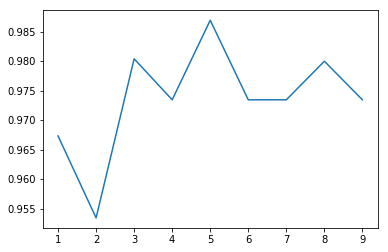

In [46]:
plt.plot(range(1,10),scores)  # n的值其实和 分类效果关系不大

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
scores = []
for i in range(1,10):
    dtree = DecisionTreeClassifier(max_depth=i)
    score = cross_val_score(dtree,data,target).mean()
    scores.append(score)

scores

[0.6666666666666666,
 0.9473039215686274,
 0.960375816993464,
 0.9673202614379085,
 0.9673202614379085,
 0.960375816993464,
 0.960375816993464,
 0.960375816993464,
 0.960375816993464]

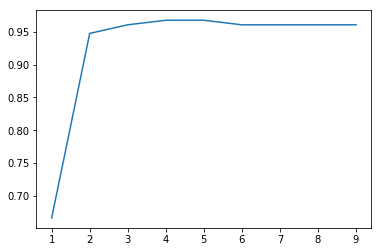

In [50]:
plt.plot(range(1,10),scores)